In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from matplotlib.font_manager import FontProperties

In [72]:
mfont = FontProperties(fname=r'C:\Windows\Fonts\simhei.ttf', size=14)
sns.set(font = mfont.get_name())

raw_data = pd.read_excel('expances.xlsx', 'sheet1', index_col='userid', na_values=['#N/A'])

In [62]:
car_raw_data = raw_data.iloc[:, :4]
car_data = car_raw_data.dropna(how='any')
car_lowist_price = car_data['报价'].apply(lambda x: re.findall(r'\d+\.?\d*', x)[0])
car_highist_price = car_data['报价'].apply(lambda x: re.findall(r'\d+\.?\d*', x)[1])
car_data.insert(3, '最低报价', pd.to_numeric(car_lowist_price))
car_data.insert(4, '最高报价', pd.to_numeric(car_highist_price))
car_mean_price = car_data.iloc[:, 3:5].mean(1)
car_data.insert(5, '中间报价', car_mean_price)

In [60]:
pieces = [raw_data.iloc[:, 4:9], raw_data.iloc[:, 14], raw_data.iloc[:, 17], raw_data.iloc[:, 76:]]

car_price_factor = pd.concat(pieces, axis=1)
car_price_factor.drop(car_price_factor.columns[[8, 10, 12, 14, 16]], axis=1, inplace=True)

cities = car_price_factor.iloc[:, 7:]
cities.fillna(0, inplace=True)
cities[cities != 0] = 1
cities['消费城市数量'] = cities.apply(lambda x: x.sum(), axis=1)
cities = cities.iloc[:, 5]
car_price_factor = car_price_factor.iloc[:, :7]
car_price_factor = pd.merge(car_price_factor, cities.to_frame(name='消费城市数量'), on='userid')

In [63]:
expances_data = pd.merge(car_data, car_price_factor, on='userid')
expances_data = expances_data.dropna(how='any')
expances_data

,型号,品牌,年份,最低报价,最高报价,中间报价,报价,性别,年龄段,借记卡数,贷记卡数,近1年单笔交易金额最大值,近1年消费总笔数,近1年消费总金额,消费城市数量
userid,,,,,,,,,,,,,,,
3,A6,奥迪,2002.0,30.8,54.2,42.50,[ 30.8 - 54.2 ] 万,男,4.0,2,0,1660.00,5,3194.00,1
5,嘉年华,福特,2013.0,8.0,12.3,10.15,[ 8.0 - 12.3 ] 万,男,4.0,1,1,3166.63,1,3166.63,1
6,福克斯,福特,2009.0,11.9,15.4,13.65,[ 11.9 - 15.4 ] 万,男,5.0,1,1,2374.10,18,7519.25,3
7,福克斯,福特,2009.0,11.9,15.4,13.65,[ 11.9 - 15.4 ] 万,女,5.0,1,0,2450.00,6,5671.68,1
9,普拉多,丰田,2004.0,53.1,63.0,58.05,[ 53.1 - 63.0 ] 万,女,6.0,1,0,14.69,1,14.69,1
10,宝来,大众,2011.0,10.8,14.8,12.80,[ 10.8 - 14.8 ] 万,女,5.0,2,1,500.00,4,1089.70,1
12,DX7,东南,2015.0,10.0,14.2,12.10,[ 10.0 - 14.2 ] 万,男,6.0,1,4,1011.00,3,2041.94,1
16,天籁,日产,2004.0,25.0,35.0,30.00,[ 25.0 - 35.0 ] 万,男,5.0,2,1,790.00,1,790.00,1
17,QQ3,奇瑞,2004.0,4.0,5.9,4.95,[ 4.0 - 5.9 ] 万,女,6.0,2,1,2000.00,11,5000.00,1


In [65]:
column_names = list(expances_data.columns)
y_column_name = column_names[5]
column_names

['型号',
 '品牌',
 '年份',
 '最低报价',
 '最高报价',
 '中间报价',
 '报价',
 '性别',
 '年龄段',
 '借记卡数',
 '贷记卡数',
 '近1年单笔交易金额最大值',
 '近1年消费总笔数',
 '近1年消费总金额',
 '消费城市数量']

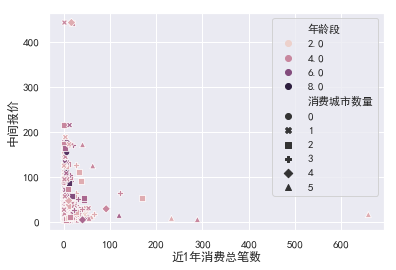

In [79]:
ax = sns.scatterplot(x = column_names[-3], y = y_column_name, hue=column_names[-7], style=column_names[-1], data = expances_data)

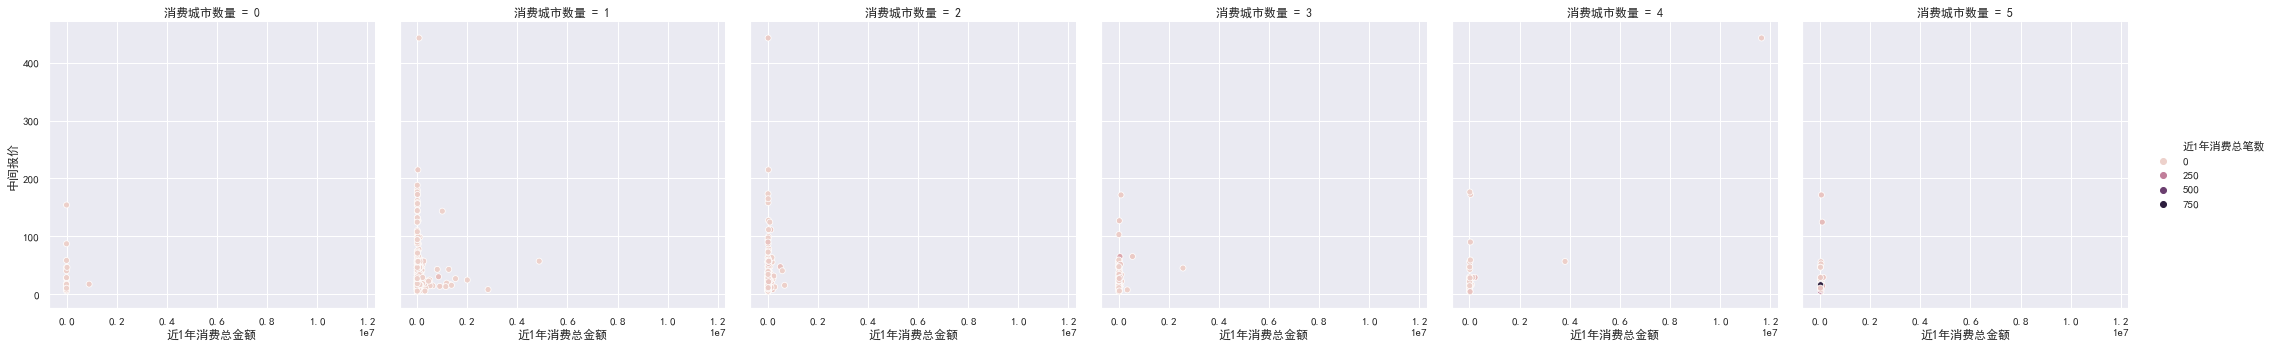

In [77]:
#sns.relplot(x=column_names[-2], y=y_column_name, hue=column_names[-3], col=column_names[-1], data=expances_data);